## IACBE 
International Accrediation Council for Business Education (IACBE)

In [1]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [72]:
url = "https://iacbe.org/accreditation/member-status-information/results/?BCountry=&BState=&BStatus=&BAlpha="
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")
#print(soup.prettify())

In [73]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html class="no-js" lang="en-US">
 <head>
  <!--
           ▲
          ◢▮◣          ██████  ██████
     ◥▮▮▮▮▮▮▮▮▮▮▮◤     ██   ██      ██
       ◥▮▮▮▮▮▮▮◤       ██████   █████
       ◢▮▮◤ ◥▮▮◣       ██           ██
      ◢▮◤     ◥▮◣      ██      ██████
    Created By: propaganda3.com
    -->
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createEle


In [74]:
my_div = soup.find("div",{"class":"scroll-table"})
#print(my_div.prettify())

In [75]:
my_table = my_div.find("table")
#print(my_table.prettify())

In [76]:
my_ths = my_table.find_all("th")
my_ths

[<th class="">Institution Name</th>,
 <th class="">Location</th>,
 <th class="">Academic Business Unit</th>,
 <th class="">Membership Status<br/>(Click for more information)</th>]

In [77]:
column_names = []
for th in my_ths:
    column_names.append(th.text.strip())
column_names

['Institution Name',
 'Location',
 'Academic Business Unit',
 'Membership Status(Click for more information)']

In [102]:
column_names[0] = "Institution"
column_names[3] = "Membership Status"
column_names

['Institution', 'Location', 'Academic Business Unit', 'Membership Status']

In [103]:
my_rows = my_table.find_all("tr")
my_rows[:4]    # display the first three rows

[<tr class=""> <th class="">Institution Name</th> <th class="">Location</th> <th class="">Academic Business Unit</th> <th class="">Membership Status<br/>(Click for more information)</th> </tr>,
 <tr class=""> <td class=""><strong><a class=" txt-underline" href="http://www.theaims.ac.in/" target="_blank">AIMS Institute of Higher Education (AIMS Institutes)</a></strong></td> <td class="">India</td> <td class=""></td> <td class=""><a class="txt-underline" href="http://www.iacbe.org/memberpdf/AIMSInstitute.pdf" target="_blank">Accredited Member (pdf)</a></td> </tr>,
 <tr class=""> <td class=""><strong><a class=" txt-underline" href="https://abbs.edu.in/" target="_blank">Acharya Bangalore Business School</a></strong></td> <td class="">India</td> <td class="">Acharya Bangalore Business School</td> <td class=""><a class="txt-underline" href="http://www.iacbe.org/memberpdf/AcharyaBangaloreBusinessSchool.pdf" target="_blank">Accredited Member (pdf)</a></td> </tr>,
 <tr class=""> <td class=""><s

In [104]:
rows = []
for tr in my_rows:
    columns = []
    for td in tr.find_all("td"):
        columns.append(td.text.strip())
    rows.append(columns)
rows[:3]   # print the first 2 rows

[[],
 ['AIMS Institute of Higher Education (AIMS Institutes)',
  'India',
  '',
  'Accredited Member (pdf)'],
 ['Acharya Bangalore Business School',
  'India',
  'Acharya Bangalore Business School',
  'Accredited Member (pdf)']]

In [105]:
df = pd.DataFrame(rows)
df.head(10)

,0,1,2,3
0,None,None,None,None
1,AIMS Institute of Higher Education (AIMS Insti...,India,,Accredited Member (pdf)
2,Acharya Bangalore Business School,India,Acharya Bangalore Business School,Accredited Member (pdf)
3,Aditya Degree College,India,,Educational Member (pdf)
4,Adventist International Institute of Advanced ...,Philippines,,Educational Member (pdf)
5,Alaska Pacific University,AK,Institute of Business & Public Policy,Accredited Member (pdf)
6,Albertus Magnus College,CT,The Tagliatela School of Business and Leadership,Accredited Member (pdf)
7,Alliance University,India,Alliance School of Business,Accredited Member (pdf)
8,American Business School of Paris,France,,Accredited Member (pdf)
9,American Graduate School of Business,Switzerland,,Accredited Member (pdf)


In [106]:
df.columns = column_names
df.head()

,Institution,Location,Academic Business Unit,Membership Status
0,None,None,None,None
1,AIMS Institute of Higher Education (AIMS Insti...,India,,Accredited Member (pdf)
2,Acharya Bangalore Business School,India,Acharya Bangalore Business School,Accredited Member (pdf)
3,Aditya Degree College,India,,Educational Member (pdf)
4,Adventist International Institute of Advanced ...,Philippines,,Educational Member (pdf)


In [107]:
# Drop the first row
df.drop(df.index[0], inplace=True)
df.head()

,Institution,Location,Academic Business Unit,Membership Status
1,AIMS Institute of Higher Education (AIMS Insti...,India,,Accredited Member (pdf)
2,Acharya Bangalore Business School,India,Acharya Bangalore Business School,Accredited Member (pdf)
3,Aditya Degree College,India,,Educational Member (pdf)
4,Adventist International Institute of Advanced ...,Philippines,,Educational Member (pdf)
5,Alaska Pacific University,AK,Institute of Business & Public Policy,Accredited Member (pdf)


In [108]:
df["Country"] = df["Location"].apply(lambda x: x if len(x) > 2 else "United States")
df.head(10)

,Institution,Location,Academic Business Unit,Membership Status,Country
1,AIMS Institute of Higher Education (AIMS Insti...,India,,Accredited Member (pdf),India
2,Acharya Bangalore Business School,India,Acharya Bangalore Business School,Accredited Member (pdf),India
3,Aditya Degree College,India,,Educational Member (pdf),India
4,Adventist International Institute of Advanced ...,Philippines,,Educational Member (pdf),Philippines
5,Alaska Pacific University,AK,Institute of Business & Public Policy,Accredited Member (pdf),United States
6,Albertus Magnus College,CT,The Tagliatela School of Business and Leadership,Accredited Member (pdf),United States
7,Alliance University,India,Alliance School of Business,Accredited Member (pdf),India
8,American Business School of Paris,France,,Accredited Member (pdf),France
9,American Graduate School of Business,Switzerland,,Accredited Member (pdf),Switzerland
10,American International College,MA,"School of Business, Arts, and Sciences",Accredited Member (pdf),United States


In [109]:
df["State"] = df["Location"].apply(lambda x: x if len(x) == 2 else "")
df.head(10)

,Institution,Location,Academic Business Unit,Membership Status,Country,State
1,AIMS Institute of Higher Education (AIMS Insti...,India,,Accredited Member (pdf),India,
2,Acharya Bangalore Business School,India,Acharya Bangalore Business School,Accredited Member (pdf),India,
3,Aditya Degree College,India,,Educational Member (pdf),India,
4,Adventist International Institute of Advanced ...,Philippines,,Educational Member (pdf),Philippines,
5,Alaska Pacific University,AK,Institute of Business & Public Policy,Accredited Member (pdf),United States,AK
6,Albertus Magnus College,CT,The Tagliatela School of Business and Leadership,Accredited Member (pdf),United States,CT
7,Alliance University,India,Alliance School of Business,Accredited Member (pdf),India,
8,American Business School of Paris,France,,Accredited Member (pdf),France,
9,American Graduate School of Business,Switzerland,,Accredited Member (pdf),Switzerland,
10,American International College,MA,"School of Business, Arts, and Sciences",Accredited Member (pdf),United States,MA


In [112]:
agg = df.groupby("Membership Status")["Institution"].count().sort_values()
agg

Membership Status
Candidate for Accreditation (pdf)     15
Educational Member (pdf)              42
Accredited Member (pdf)              182
Name: Institution, dtype: int64

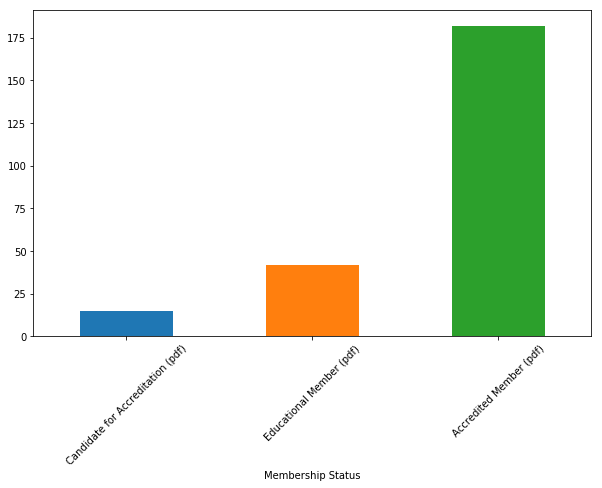

In [111]:
fig, ax = plt.subplots(figsize=(10,6))
agg.plot.bar(ax=ax, rot=45)

In [113]:
agg2 = df[df["Country"] != "United States"].groupby("Country")["Institution"].count().sort_values()
agg2

Country
Lebanon                  1
Uganda                   1
Turkey                   1
Thailand                 1
Spain                    1
Netherlands              1
Italy                    1
Indonesia                1
Vietnam                  1
Germany                  1
Dominican Republic       1
Curacao                  1
Guam                     1
Czech Republic           1
Guatemala                2
Cayman Islands           2
United Arab Emirates     2
Suriname                 2
Puerto Rico              2
China                    3
Afghanistan              3
North Cyprus             3
France                   3
Philippines              3
Poland                   4
Switzerland             10
India                   11
Name: Institution, dtype: int64

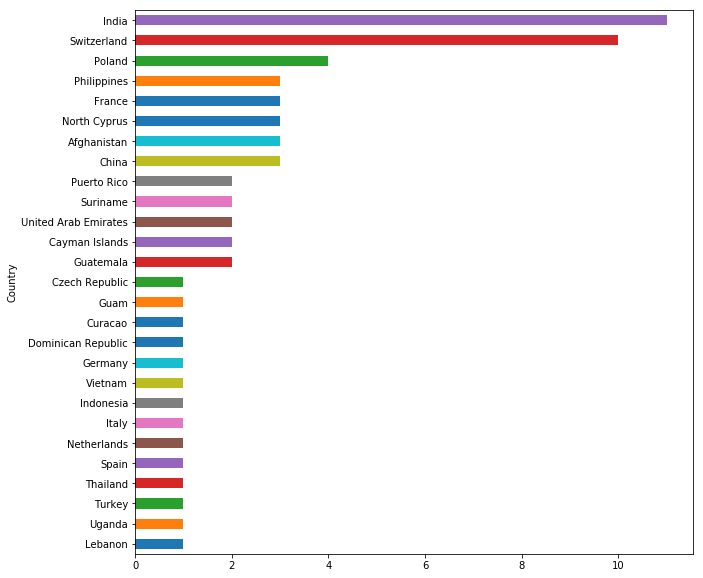

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
agg2.plot.barh(ax=ax)

In [114]:
agg3 = df[df["Country"] == "United States"].groupby("State")["Institution"].count().sort_values()
agg3

State
AK     1
NV     1
CO     1
NM     1
DE     1
NH     1
HI     1
ID     1
SC     2
MO     2
ME     2
LA     2
MS     2
CT     2
KS     2
IA     2
NC     3
RI     3
AL     3
TN     3
OK     3
MT     3
OR     3
VA     3
IN     3
WI     3
MN     4
ND     4
NE     4
MI     4
TX     4
MD     4
SD     4
WV     4
KY     5
NJ     5
FL     6
IL     7
OH     9
CA    12
PA    12
MA    13
NY    20
Name: Institution, dtype: int64

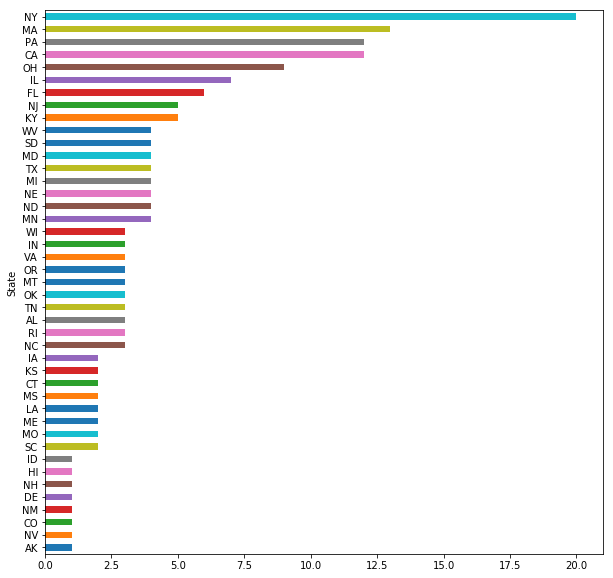

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
agg3.plot.barh(ax=ax)

In [115]:
df.head()

,Institution,Location,Academic Business Unit,Membership Status,Country,State
1,AIMS Institute of Higher Education (AIMS Insti...,India,,Accredited Member (pdf),India,
2,Acharya Bangalore Business School,India,Acharya Bangalore Business School,Accredited Member (pdf),India,
3,Aditya Degree College,India,,Educational Member (pdf),India,
4,Adventist International Institute of Advanced ...,Philippines,,Educational Member (pdf),Philippines,
5,Alaska Pacific University,AK,Institute of Business & Public Policy,Accredited Member (pdf),United States,AK


In [116]:
df.to_csv("./output/IACBE.csv")

The END